## Description

Script to read in, store as feather, and plot unweighted generation level distributions.

At the end there is some code to re-produce/determine the sampling bug that happened for the 1906{08,09,10,11,12} sets as well as everything related to weighting (which is not present anymore in the new sets) and some further cross checks.

In [1]:
import glob
import sys, os
import numpy as np

import pandas as pd

from collections import OrderedDict

import matplotlib.pyplot as plt

style_file = os.path.expandvars('$I3_SRC/LeptonInjector/python/hnl_mpl_plotstyle.mplstyle')
plt.style.use(style_file)

from icecube.LeptonInjector import hnl_weighting
from icecube.LeptonInjector import hdf5_to_feather

# base_plot_dir = '/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/'
base_plot_dir = '/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/'
print(base_plot_dir)

/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/


#### Simulation set masses

In [2]:
sim_sets = [    
    '190614',
    '190615',
    '190616',
    
    '190619',
    '190618',
    '190617',
]

masses = [
    '0.3 GeV-low',
    '0.6 GeV-low',
    '1.0 GeV-low',
    
    '0.3 GeV-high',
    '0.6 GeV-high',
    '1.0 GeV-high',
]

set_mass_relation = dict(
    zip(sim_sets, masses)
)

## Read in data from stored feather files

In [3]:
%%time

# read data from feather files directly

simset_data = OrderedDict()

# subset = 1  # to test OSG production

# subset = 50  # just have ReferenceWeight_1e-03
# subset = 10  # have more keys for plotting

subset = 15

for key in sim_sets:
    print(key)
    inpath = '/data/ana/BSM/HNL/MC/feather_files/gen_level/{}_generation_level_{}_files_subset.feather'.format(key, subset)
    simset_data[key] = pd.read_feather(inpath)

190614
190615
190616
190619
190618
190617
CPU times: user 2.22 s, sys: 15.9 s, total: 18.1 s
Wall time: 16 s


### Plot some distributions

In [4]:
# Calculate cosine zenith
for key, item in simset_data.items():
    item['true_cos_zenith'] = np.cos(item['true_zenith'])

In [5]:
plot_variables = [
    'true_energy',

    'true_x',
    'true_y',
    'true_z',

    'true_cos_zenith',
    'true_azimuth',
    
    'distance',
    'lifetime',
    
    'casc0_true_energy',
    'casc1_true_energy',
    
    'HNL_true_energy',
    
    'decay_channel',
    
    'finalStateX',
    'finalStateY',
]

labels = [
    r'$E_{\rm true}^{\nu}$ [GeV]',
    
    r'$x_{\rm true}$ [m]',
    r'$y_{\rm true}$ [m]',
    r'$z_{\rm true}$ [m]',
    
    r'$\cos(\theta_{\rm true})$',
    r'$\phi_{\rm true}$',
    
    r'$L^{\rm decay}_{\rm true}$ [m]',
    r'$\tau_{\rm true}$ [ns]',
    
    r'$E_{\rm true}^{\rm casc0}$ [GeV]',
    r'$E_{\rm true}^{\rm casc1}$ [GeV]',
    
    r'$E_{\rm true}^{\rm HNL}$ [GeV]',
    
    r'Channel',
    
    r'$x$',
    r'$y$',
]

import matplotlib as mpl
tab_colors = list(mpl.colors.TABLEAU_COLORS)
set_colors = dict(zip(simset_data,tab_colors[:len(simset_data)]))

nbins = 40

bins = [
    np.geomspace(2e00,1e04,nbins),

    np.linspace(-600,600,nbins),
    np.linspace(-600,600,nbins),
    np.linspace(-600,0,nbins),

    np.linspace(-1.0,0.2,nbins),
    np.linspace(0.0,2*np.pi,nbins),
    
# # #     large length sets
# # #     np.geomspace(1e00,1e03,nbins),
#     np.geomspace(1e-01,1e06,nbins),
# #     np.linspace(0,2e05,nbins),
# #     np.linspace(0,2e04,nbins),
        
# #     short length sets
# #     np.geomspace(1e-04,1e00,nbins),
#     np.linspace(0,1e00,nbins),
    
#     combined
    np.geomspace(1e-04,2e04,nbins),
#     np.linspace(0,2e04,nbins),
    
    np.geomspace(1.0e-8, 1e6, nbins),
    
    np.geomspace(5e-01,1e04,nbins),
    np.geomspace(8e-02,1e04,nbins),
    
    np.geomspace(1e-02,1e04,nbins),
    
    np.linspace(0,11,12),
    
    np.geomspace(1e-02,1e00,nbins),
    np.geomspace(1e-02,1e00,nbins),
]

y_lims_unweighted = {
    'true_z':(1e04,2e04),
    'true_azimuth':(1e06,2e06),
}
y_lims_weighted = {
#     'true_z':(1e-12,1e-06),
#     'true_azimuth':(1e-12,1e-06),

#     'decay_channel':(1e-20,1e-09),
    
#     'finalStateX':(1e-20,1e-09),
#     'finalStateY':(1e-20,1e-09),
    
#     'distance':(1e-20,1e-09),
}

x_scale_log = [
    'true_energy',
    'casc0_true_energy',
    'casc1_true_energy',
    'HNL_true_energy',
    'distance',
    'lifetime',
    'finalStateX',
    'finalStateY',
]

y_scale_log = [
    'true_energy',
    'true_x',
    'true_y',
    'true_z',
    'true_cos_zenith',
    'true_azimuth',
    'distance',
    'lifetime',
    'casc0_true_energy',
    'casc1_true_energy',
    'HNL_true_energy',
    'decay_channel',
    'finalStateX',
    'finalStateY',
    ]

plot_labels = dict(zip(plot_variables, labels))
plot_bins = dict(zip(plot_variables, bins))

/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_true_energy_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_true_x_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_true_y_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_true_z_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_true_cos_zenith_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_true_azimuth_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_distance_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_gen_level_plots/unweighted/1_d_distr_lifetime_gen_level_unweighted.png
/data/user/lfischer/plots_all/2023/05_combined_g

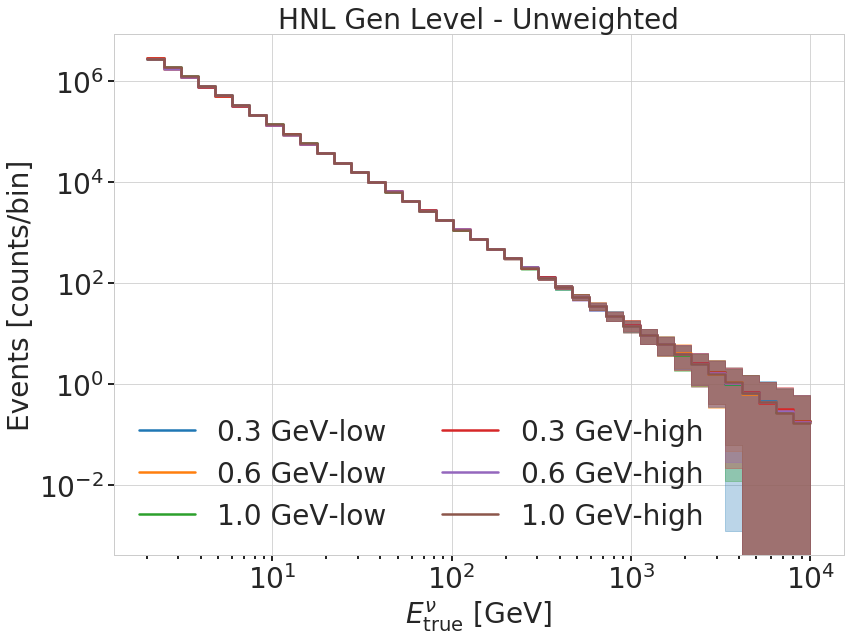

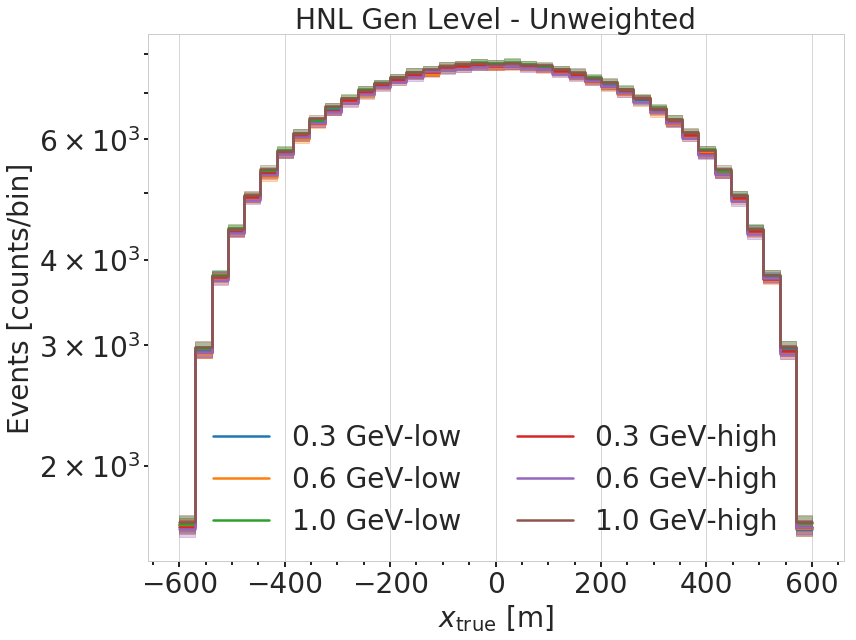

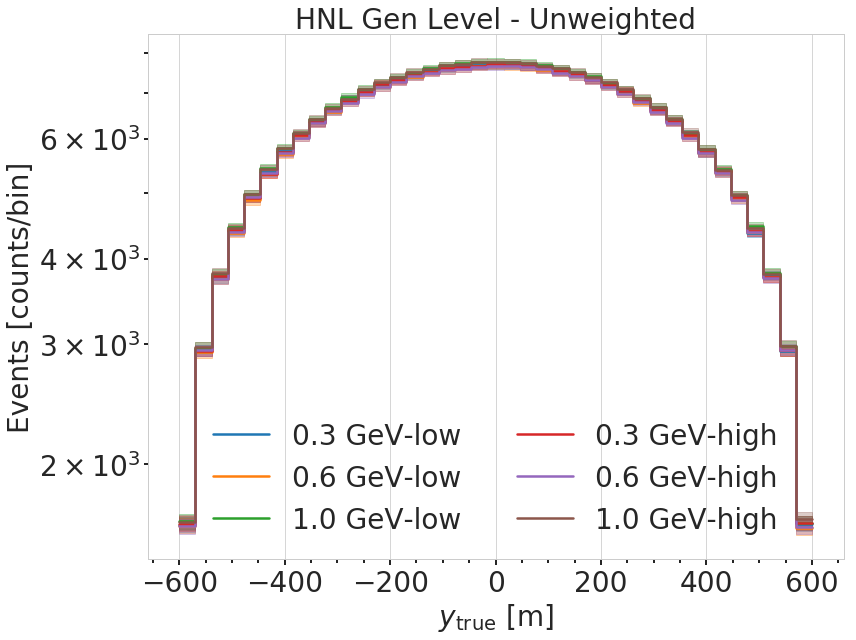

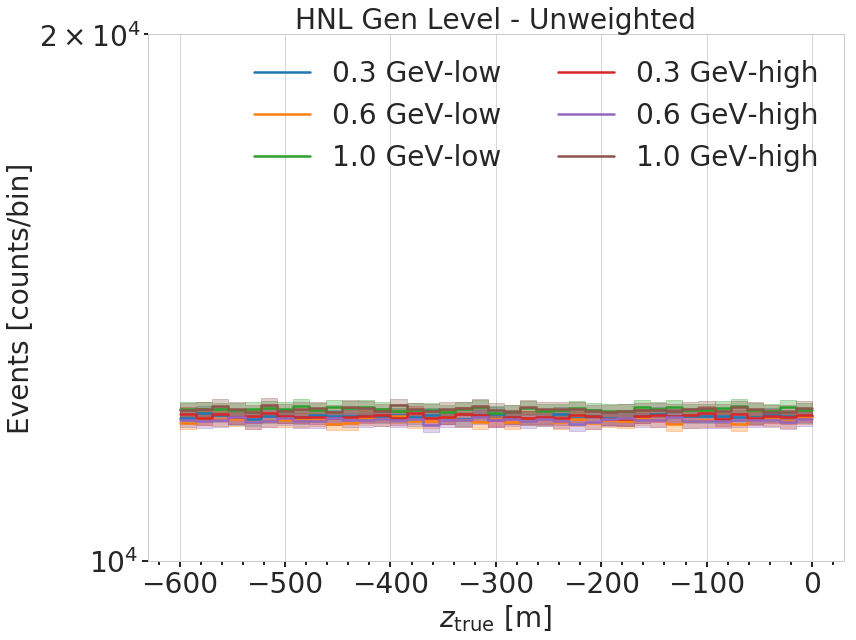

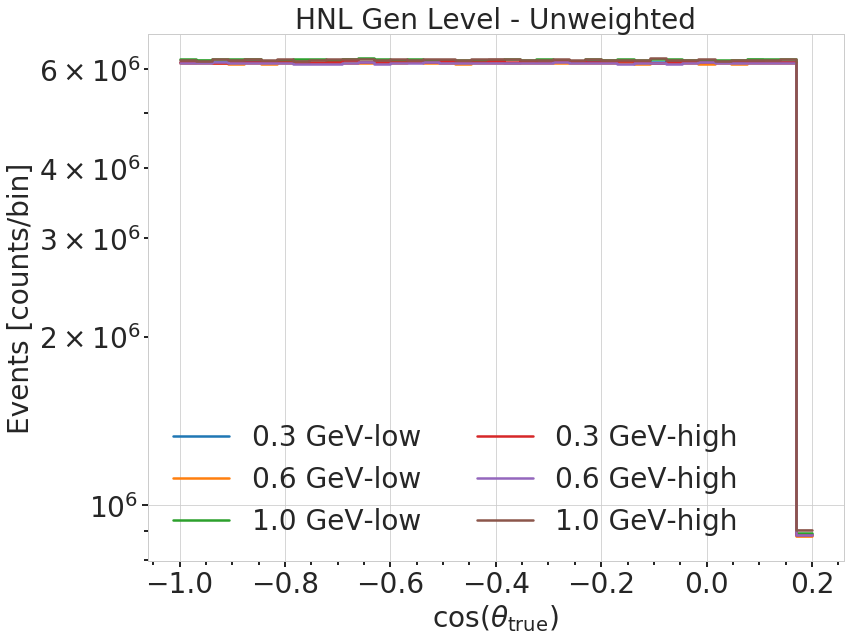

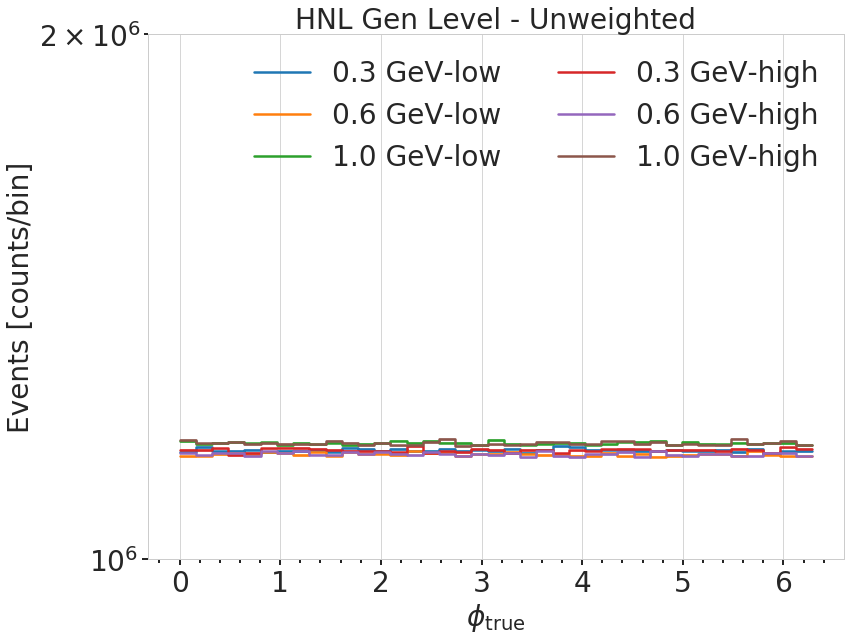

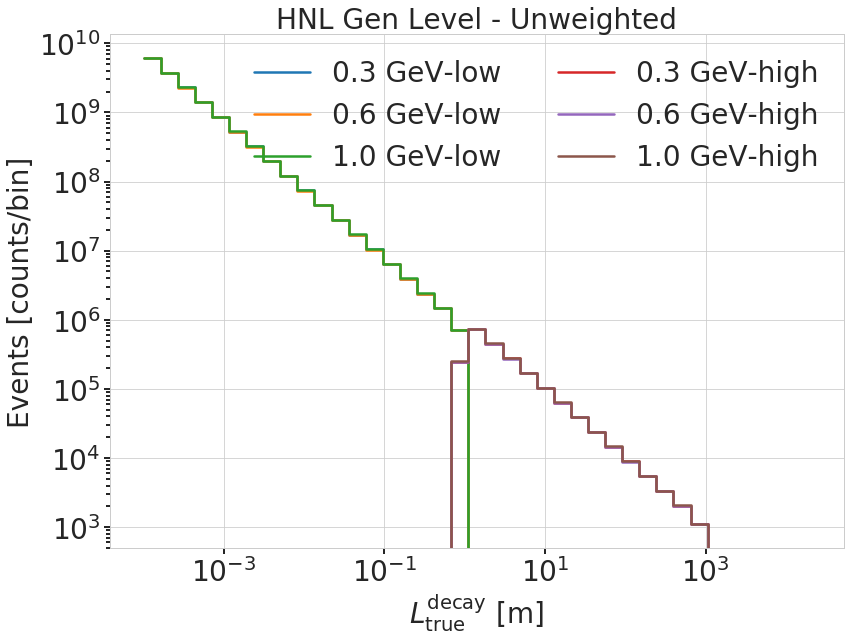

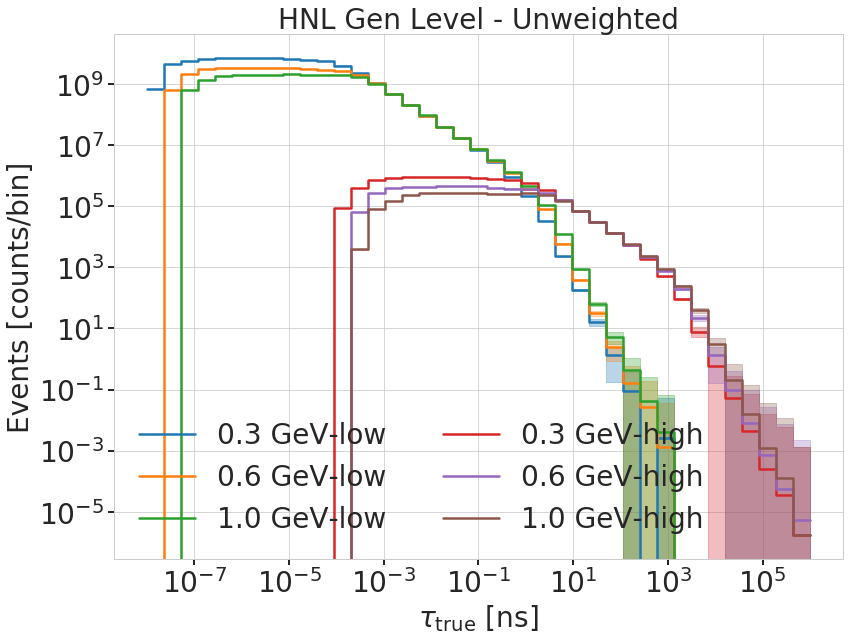

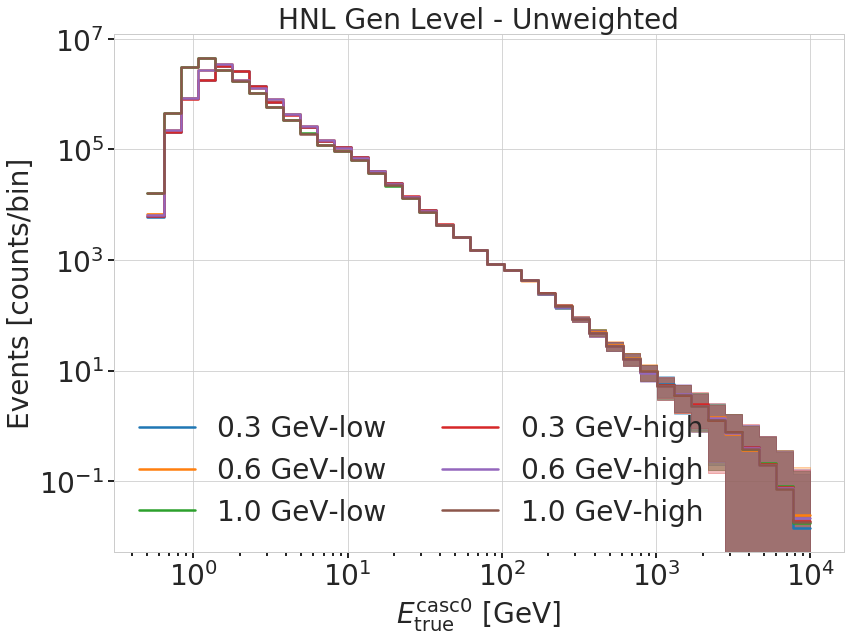

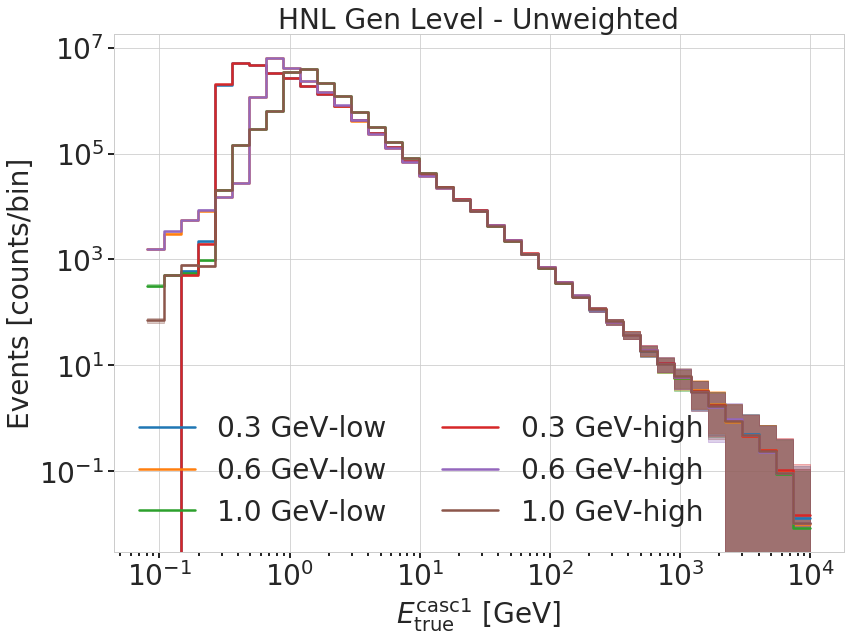

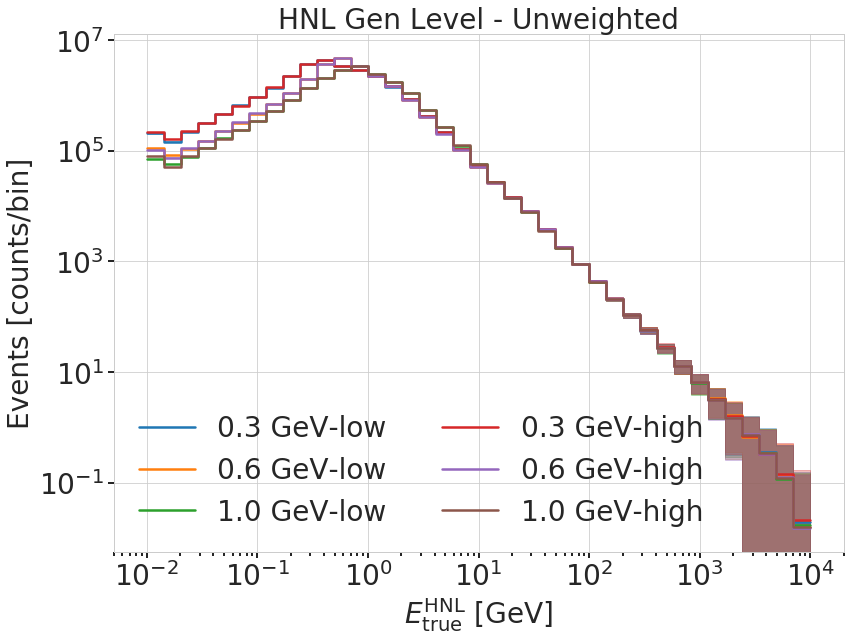

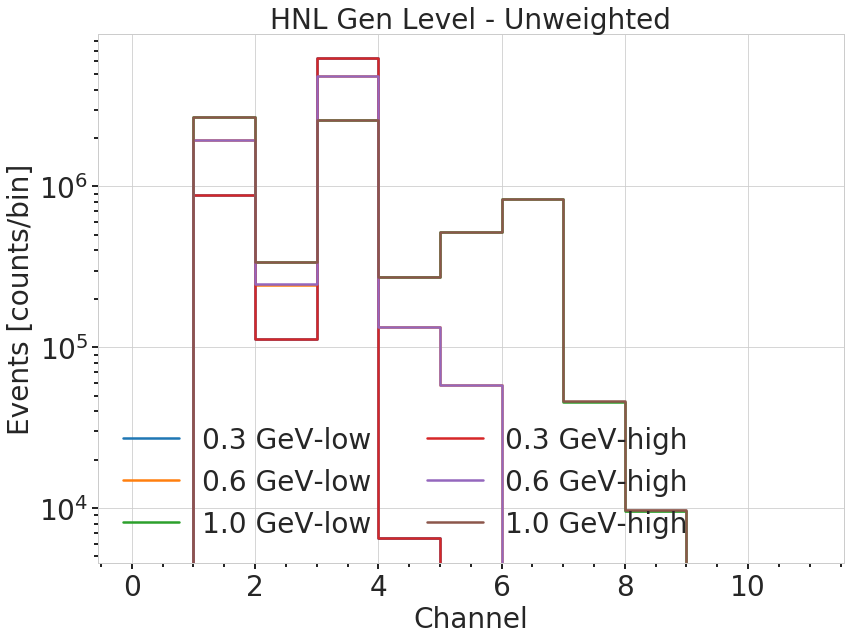

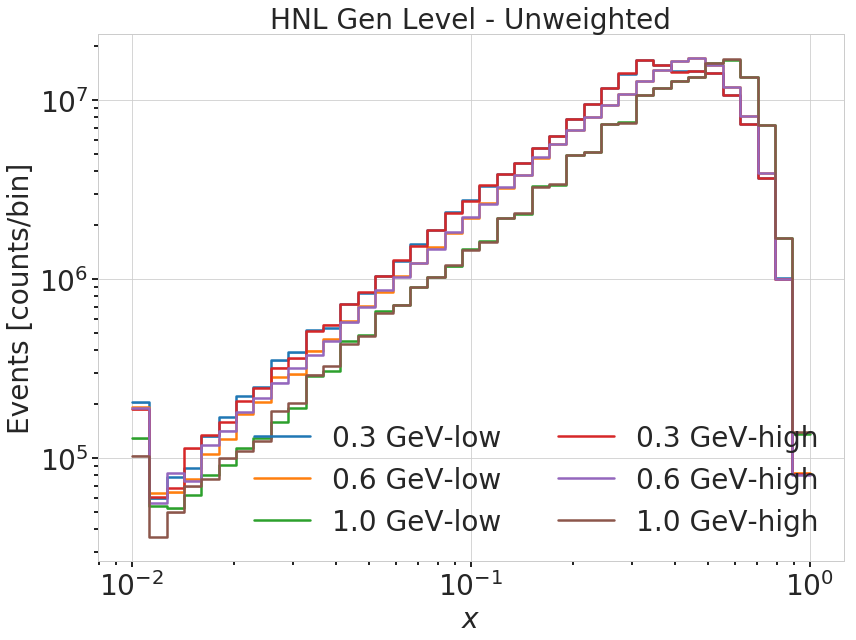

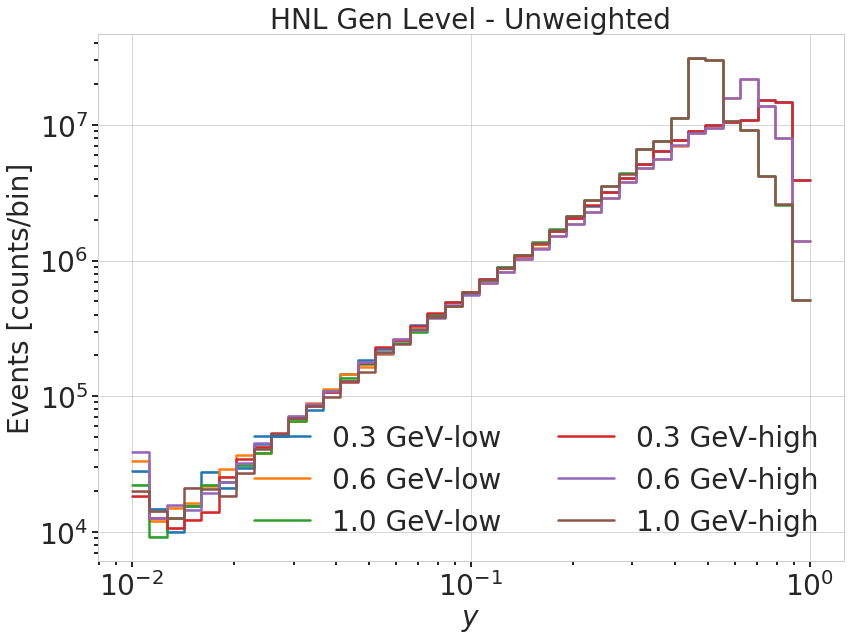

In [6]:
%%time

only_plot = [
    'true_z',
    'true_azimuth',
#     'lifetime',
]

# does not exit for all anymore..
# weight_key = 'ReferenceWeight_1e-03'
# weight_label = r'$|U_{\tau4}|^2=10^{-03}$'

clip = True

scale_bins = True

# to speed it up for testing bin ranges
# N_test = 10000
N_test = None

# for weighted in [True, False]:
# for weighted in [True]:
for weighted in [False]:
    
    for plot_var in plot_variables:
        
#         if plot_var not in only_plot: continue
#         print(plot_var)

        if(weighted):

            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,9))
            
            for sim_set, dataframe in simset_data.items():
#                 print(sim_set)
                
                if clip:
                    counts=np.clip(dataframe[plot_var], plot_bins[plot_var][0], plot_bins[plot_var][-1])
                else:
                    if N_test:
                        counts=(dataframe[plot_var][:N_test])
                    else:
                        counts=(dataframe[plot_var])
                
                if N_test:
                    weight = dataframe[weight_key][:N_test] * weight_scale  # scale for number of files used
                else:
                    weight = dataframe[weight_key] * weight_scale  # scale for number of files used

#                 filter events with nan weight
                counts = counts[np.logical_not(np.isnan(dataframe[weight_key]))]
                weight = weight[np.logical_not(np.isnan(dataframe[weight_key]))]
                
                n, _ = np.histogram(
                    counts,
                    bins=plot_bins[plot_var],
                    weights=weight
                )

    #             divide by bin width
                if scale_bins:
                    n_binscaled = n.astype('float') / (plot_bins[plot_var][1:] - plot_bins[plot_var][:-1])
                else:
                    n_binscaled = n

                hist_ext = np.concatenate((n_binscaled, [n_binscaled[-1]]))

                ax.step(
                    plot_bins[plot_var],
                    hist_ext, 
                    where='post', 
                    lw=2.5, 
                    color=set_colors[sim_set], 
                    label='{}'.format(set_mass_relation[sim_set]),
                )

                errors, _ = np.histogram(counts,
                                         bins=plot_bins[plot_var],
                                         weights=weight**2
                                         )

                errors = np.sqrt(errors)  # mc errors

    #             divide by bin width
                if scale_bins:
                    errors_binscaled = errors.astype('float') / (plot_bins[plot_var][1:] - plot_bins[plot_var][:-1])
                else:
                    errors_binscaled = errors

                errs_ext = np.concatenate((errors_binscaled, [errors_binscaled[-1]]))

                ax.fill_between(
                    plot_bins[plot_var], 
                    hist_ext-errs_ext, 
                    hist_ext+errs_ext, 
                    color=set_colors[sim_set], 
                    step='post', 
                    alpha=.3)

#                 specific plot style
                ax.set_title('HNL Gen Level - Weighted ({})'.format(weight_label))
    
                if scale_bins:
                    ax.set_ylabel(r'Rate [Hz/bin]')
                else:
                    ax.set_ylabel(r'Rate [Hz]')
        
                if plot_var in y_lims_weighted:
                    ax.set_ylim(y_lims_weighted[plot_var])
                                    
#                 just one sim set
#                 break

        else:

            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,9))
            
            for sim_set, dataframe in simset_data.items():
#                 print(sim_set)
                
                if clip:
                    counts=np.clip(dataframe[plot_var], plot_bins[plot_var][0], plot_bins[plot_var][-1])
                else:
                    if N_test:
                        counts=(dataframe[plot_var][:N_test])
                    else:
                        counts=(dataframe[plot_var])

                n, _ = np.histogram(
                    counts,
                    bins=plot_bins[plot_var],
                )

    #             divide by bin width
                if scale_bins:
                    n_binscaled = n.astype('float') / (plot_bins[plot_var][1:] - plot_bins[plot_var][:-1])
                else:
                    n_binscaled = n


                hist_ext = np.concatenate((n_binscaled, [n_binscaled[-1]]))

                ax.step(
                    plot_bins[plot_var],
                    hist_ext, 
                    where='post', 
                    lw=2.5, 
                    color=set_colors[sim_set], 
                    label='{}'.format(set_mass_relation[sim_set]),
                ) 

                errors = np.sqrt(n_binscaled)  # mc errors

                errs_ext = np.concatenate((errors, [errors[-1]]))

                ax.fill_between(
                    plot_bins[plot_var], 
                    hist_ext-errs_ext, 
                    hist_ext+errs_ext, 
                    color=set_colors[sim_set], 
                    step='post', 
                    alpha=.3
                )
                
#                 specific plot style
                ax.set_title('HNL Gen Level - Unweighted')
                
                if scale_bins:
                    ax.set_ylabel(r'Events [counts/bin]')
                else:
                    ax.set_ylabel(r'Events [counts]')
        
                if plot_var in y_lims_unweighted:
                    ax.set_ylim(y_lims_unweighted[plot_var])
                    
#                 just one sim set
#                 break
        
        
#         combined style
        ax.set_xlabel(plot_labels[plot_var])

        if plot_var in x_scale_log:
            ax.set_xscale('log')
        if plot_var in y_scale_log:
            ax.set_yscale('log')

        ax.legend(
            ncol=2,
#             loc='lower center',
            loc='best',
            fontsize=28,
        )

        ax.minorticks_on()

        fig.tight_layout()
        
        filename = '1_d_distr_{}_gen_level.png'.format(plot_var)

        plot_dir = base_plot_dir

        if not weighted:
            plot_dir = os.path.join(plot_dir, 'unweighted')
            if not os.path.isdir(plot_dir):os.makedirs(plot_dir)
            filename = filename.replace('.png', '_unweighted.png')
            filepath = os.path.join(plot_dir,filename)
        else:
            plot_dir = os.path.join(plot_dir, 'weighted_{}'.format(weight_key))
            if not os.path.isdir(plot_dir):os.makedirs(plot_dir)
            filename = filename.replace('.png', '_weighted_{}.png'.format(weight_key))

        filepath = os.path.join(plot_dir,filename)

        print(filepath)
#         fig.savefig(filepath, dpi=300)

#         just first plot_var
#         break

### Plot energies on the same plot

In [27]:
plot_bins['casc0_true_energy'] = np.geomspace(5e-02,2e04,nbins)
plot_bins['casc1_true_energy'] = np.geomspace(5e-02,2e04,nbins)

In [33]:
plot_bins['true_energy'] = np.geomspace(8e-03,2e04,nbins)
plot_bins['HNL_true_energy'] = np.geomspace(8e-03,2e04,nbins)

In [7]:
%%time

only_plot = [
    'true_energy',
    'HNL_true_energy',

#     'casc0_true_energy',
#     'casc1_true_energy',
]

weight_key = 'ReferenceWeight_1e-03'
weight_label = r'$|U_{\tau4}|^2=10^{-03}$'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,9))

clip = True
scale_bins = True

# N_test = 10000
N_test = None

# for weighted in [True, False]:
for weighted in [False]:
# for weighted in [True]:
    
    for plot_var in plot_variables:
        
        if plot_var not in only_plot: continue
#         print(plot_var)

        if(weighted):

            
            for sim_set, dataframe in simset_data.items():
#                 print(sim_set)
                
                if clip:
                    counts=np.clip(dataframe[plot_var], plot_bins[plot_var][0], plot_bins[plot_var][-1])
                else:
                    if N_test:
                        counts=(dataframe[plot_var][:N_test])
                    else:
                        counts=(dataframe[plot_var])
                
                if N_test:
                    weight = dataframe[weight_key][:N_test] * weight_scale  # scale for number of files used
                else:
                    weight = dataframe[weight_key] * weight_scale  # scale for number of files used

#                 filter events with nan weight
                counts = counts[np.logical_not(np.isnan(dataframe[weight_key]))]
                weight = weight[np.logical_not(np.isnan(dataframe[weight_key]))]
                
                n, _ = np.histogram(
                    counts,
                    bins=plot_bins[plot_var],
                    weights=weight
                )

    #             divide by bin width
                if scale_bins:
                    n_binscaled = n.astype('float') / (plot_bins[plot_var][1:] - plot_bins[plot_var][:-1])
                else:
                    n_binscaled = n

                hist_ext = np.concatenate((n_binscaled, [n_binscaled[-1]]))

                l = ax.step(
                    plot_bins[plot_var],
                    hist_ext, 
                    where='post', 
                    lw=2.5, 
                    label=plot_labels[plot_var].replace(' [GeV]', ''),
                )

                errors, _ = np.histogram(counts,
                                         bins=plot_bins[plot_var],
                                         weights=weight**2
                                         )

                errors = np.sqrt(errors)  # mc errors

    #             divide by bin width
                if scale_bins:
                    errors_binscaled = errors.astype('float') / (plot_bins[plot_var][1:] - plot_bins[plot_var][:-1])
                else:
                    errors_binscaled = errors

                errs_ext = np.concatenate((errors_binscaled, [errors_binscaled[-1]]))

                ax.fill_between(
                    plot_bins[plot_var], 
                    hist_ext-errs_ext, 
                    hist_ext+errs_ext, 
                    color=l[0].get_color(),
                    step='post', 
                    alpha=.3)

#                 specific plot style
                ax.set_title('HNL Gen Level ($m_4=${}, {})'.format(set_mass_relation[sim_set], weight_label))
                ax.set_ylabel(r'Rate [Hz]')
                if plot_var in y_lims_weighted:
                    ax.set_ylim(y_lims_weighted[plot_var])
                
#                 just one sim set
#                 break

        else:

            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,9))
            
            for sim_set, dataframe in simset_data.items():
#                 print(sim_set)
                
                if clip:
                    counts=np.clip(dataframe[plot_var], plot_bins[plot_var][0], plot_bins[plot_var][-1])
                else:
                    if N_test:
                        counts=(dataframe[plot_var][:N_test])
                    else:
                        counts=(dataframe[plot_var])

                n, _ = np.histogram(
                    counts,
                    bins=plot_bins[plot_var],
                )

    #             divide by bin width
                if scale_bins:
                    n_binscaled = n.astype('float') / (plot_bins[plot_var][1:] - plot_bins[plot_var][:-1])
                else:
                    n_binscaled = n


                hist_ext = np.concatenate((n_binscaled, [n_binscaled[-1]]))

                ax.step(
                    plot_bins[plot_var],
                    hist_ext, 
                    where='post', 
                    lw=2.5, 
#                     color=set_colors[sim_set], 
                    label='{}'.format(set_mass_relation[sim_set]),
                ) 

                errors = np.sqrt(n_binscaled)  # mc errors

                errs_ext = np.concatenate((errors, [errors[-1]]))

                ax.fill_between(
                    plot_bins[plot_var], 
                    hist_ext-errs_ext, 
                    hist_ext+errs_ext, 
#                     color=set_colors[sim_set], 
                    step='post', 
                    alpha=.3
                )
                
#                 specific plot style
                ax.set_title('HNL Gen Level - Unweighted')
                ax.set_ylabel(r'Events [counts]')
                if plot_var in y_lims_unweighted:
                    ax.set_ylim(y_lims_unweighted[plot_var])
                
                just one sim set
                break
        
        
        ax.set_xlabel('Energy [GeV]')

        if plot_var in x_scale_log:
            ax.set_xscale('log')
        if plot_var in y_scale_log:
            ax.set_yscale('log')

        ax.legend(
            ncol=2,
            loc='lower center',
            fontsize=28,
        )

        ax.minorticks_on()

        fig.tight_layout()

# filename = '{}_1_d_distr_cascade_energies.png'.format(key)
filename = '{}_1_d_distr_nu_hnl_energies.png'.format(key)

plot_dir = base_plot_dir

if not weighted:
    plot_dir = os.path.join(plot_dir, 'unweighted')
    if not os.path.isdir(plot_dir):os.makedirs(plot_dir)
    filename = filename.replace('.png', '_unweighted.png')
    filepath = os.path.join(plot_dir,filename)
else:
    plot_dir = os.path.join(plot_dir, 'weighted_{}'.format(weight_key))
    if not os.path.isdir(plot_dir):os.makedirs(plot_dir)
    filename = filename.replace('.png', '_weighted_{}.png'.format(weight_key))

filepath = os.path.join(plot_dir,filename)

print(filepath)
# fig.savefig(filepath, dpi=300)

SyntaxError: invalid syntax (<unknown>, line 164)

## Cells to read in new files/convert fo feather file.. this takes some time

### Read/convert (subset of) gen level hdf5 files - commented out because feather files can be used

In [ ]:
sim_sets = [
#     '190609',
#     '190610',
#     '190611',
#     '190612',
    
#     '190614',
#     '190615',
#     '190616',
    
#     '190617',
#     '190618',
    '190619',
]

In [ ]:
# define base path for this set
sim_base_dir = '/data/ana/BSM/HNL/MC/'  # should work for any set

# # get list of failed files to skip (currently I cannot remove them because of permission issues..)
# failed_files_190609_csv_path = '/data/ana/BSM/HNL/MC/190609/Gen/failed_files.csv'
# failed_files_190609_df = pd.read_csv(failed_files_190609_csv_path, delimiter=',', header=None)
# failed_files_190609 = [list(row) for row in failed_files_190609_df.values][0][:-1]
# failed_files_190609 = ['{:05}'.format(int(jobid.split('job')[-1])) for jobid in failed_files_190609]

In [ ]:
# subset = 50  # just extractiv ReferenceWeight_1e-03
# subset = 10  # extract more keys for plotting

subset = 15  # extract more keys for plotting


# dict for infilepaths
infiles = OrderedDict(zip(sim_sets, [list() for _ in sim_sets]))

# get the infilepaths
for key, item in infiles.items():
#     print(key)

    these_infiles = sorted(glob.glob(os.path.join(sim_base_dir, '{}/Gen/*/*.hdf5'.format(key))))
    
    if key == '190609':
        these_infiles_not_failed = [infilepath for infilepath in these_infiles if not infilepath.split('Gen_')[-1].split('.hdf5')[0] in failed_files_190609]
        item.extend(these_infiles_not_failed[:subset])
    else:
        item.extend(these_infiles[:subset])
    
#     print(item)
#     break

print(infiles)

In [ ]:
# # just get weight to reduce runtime and take more files (~30 min for 50 files)
# keys_to_extract = [    
#     "ReferenceWeight_1e-03",
# ]

# extract more keys for plotting, but reduce number of files
keys_to_extract = [
    'true_energy',

    'true_x',
    'true_y',
    'true_z',

    'true_zenith',
    'true_azimuth',
    
    'distance',
    "distanceMax",
    "distanceMin",
    'decay_channel',
    
    'casc0_true_energy',
    'casc1_true_energy',
    
    'finalStateX',
    'finalStateY',
    
    'HNL_true_energy',
    'lifetime',
    
    "mHNL",
    
#     "ReferenceWeight_1e-03",  # not present for new sets
]

In [ ]:
%%time

# uncomment to extract data from hdf5 and store to feather

# read in the hdf5files and store the dataframes
simset_data = OrderedDict()

for key, item in infiles.items():
    print(key)
    
    outpath = '/data/ana/BSM/HNL/MC/feather_files/gen_level/{}_generation_level_{}_files_subset.feather'.format(key, subset)
    print(outpath)
    
#     simset_data[key] = hdf5_to_feather(
#         item,
#         keys=keys_to_extract,
#         outfilepath=outpath,
#     )
    
#     break

### Test generation file

In [2]:
infile_path = '/data/user/lfischer/hnl_analysis/submission_scripts/process/Gen_test_length_sampling_larger.hdf5'

In [3]:
dataframe = hdf5_to_feather(
    [infile_path],
)

INFO:root:Keys to be extracted: ['HNL_true_z', 'HNL_true_x', 'HNL_true_y', 'true_zenith', 'casc0_true_zenith', 'finalStateX', 'finalStateY', 'casc0_true_energy', 'casc1_true_y', 'casc1_true_x', 'HNL_true_energy', 'true_azimuth', 'lifetime', 'HNL_true_zenith', 'HNL_true_azimuth', 'physical', 'casc0_true_time', 'mHNL', 'true_energy', 'HNL_true_time', 'decay_channel', 'casc1_true_energy', 'casc0_true_azimuth', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'true_x', 'casc1_true_time', 'final_state_particle0', 'final_state_particle1', 'nan_decay_energy', 'distanceMin', 'primary_type', 'casc1_true_azimuth', 'true_z', 'casc1_true_zenith', 'true_y', 'outgoing_neutrino_energy', 'distance', 'true_time', 'casc1_true_z', 'total_column_depth', 'totalEnergy', 'distanceMax']
100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


In [5]:
list(dataframe.keys())

['HNL_true_azimuth',
 'HNL_true_energy',
 'HNL_true_time',
 'HNL_true_x',
 'HNL_true_y',
 'HNL_true_z',
 'HNL_true_zenith',
 'casc0_true_azimuth',
 'casc0_true_energy',
 'casc0_true_time',
 'casc0_true_x',
 'casc0_true_y',
 'casc0_true_z',
 'casc0_true_zenith',
 'casc1_true_azimuth',
 'casc1_true_energy',
 'casc1_true_time',
 'casc1_true_x',
 'casc1_true_y',
 'casc1_true_z',
 'casc1_true_zenith',
 'decay_channel',
 'distance',
 'distanceMax',
 'distanceMin',
 'finalStateX',
 'finalStateY',
 'final_state_particle0',
 'final_state_particle1',
 'lifetime',
 'mHNL',
 'n_files',
 'nan_decay_energy',
 'outgoing_neutrino_energy',
 'physical',
 'primary_type',
 'totalEnergy',
 'total_column_depth',
 'true_azimuth',
 'true_energy',
 'true_time',
 'true_x',
 'true_y',
 'true_z',
 'true_zenith']

In [17]:
plot_keys = [
#     'HNL_true_azimuth',
#     'HNL_true_energy',
#     'HNL_true_time',
#     'HNL_true_x',
#     'HNL_true_y',
#     'HNL_true_z',
#     'HNL_true_zenith',
#     'casc0_true_azimuth',
#     'casc0_true_energy',
#     'casc0_true_time',
#     'casc0_true_x',
#     'casc0_true_y',
#     'casc0_true_z',
#     'casc0_true_zenith',
#     'casc1_true_azimuth',
#     'casc1_true_energy',
#     'casc1_true_time',
#     'casc1_true_x',
#     'casc1_true_y',
#     'casc1_true_z',
#     'casc1_true_zenith',
    'decay_channel',
    'distance',
#     'distanceMax',
#     'distanceMin',
#     'finalStateX',
#     'finalStateY',
#     'final_state_particle0',
#     'final_state_particle1',
    'lifetime',
#     'mHNL',
#     'n_files',
#     'nan_decay_energy',
#     'outgoing_neutrino_energy',
#     'physical',
#     'primary_type',
    'totalEnergy',
#     'total_column_depth',
    'true_azimuth',
    'true_energy',
#     'true_time',
    'true_x',
    'true_y',
    'true_z',
    'true_zenith'
]

# set plot bins
plot_bins = dict()

plot_bins["decay_channel"] = np.linspace(0, 8, 9)
plot_bins["distance"] = np.linspace(0, 1e05, 50)

plot_bins["finalStateX"] = np.linspace(0, 1, 50)
plot_bins["finalStateY"] = np.linspace(0, 1, 50)

plot_bins["lifetime"] = np.linspace(0, 16, 50)
plot_bins["totalEnergy"] = np.linspace(0, 1e04, 50)
plot_bins["physical"] = np.linspace(0, 2, 3)

plot_bins["HNL_true_x"] = np.linspace(-600, 600, 50)
plot_bins["HNL_true_y"] = np.linspace(-600, 600, 50)
plot_bins["HNL_true_z"] = np.linspace(-600, 0, 50)

plot_bins["HNL_true_energy"] = np.linspace(0, 6e03, 50)
plot_bins["HNL_true_zenith"] = np.linspace(0, np.pi, 50)
plot_bins["HNL_true_azimuth"] = np.linspace(0, 2*np.pi, 50)

plot_bins["true_x"] = np.linspace(-600, 600, 50)
plot_bins["true_y"] = np.linspace(-600, 600, 50)
plot_bins["true_z"] = np.linspace(-600, 0, 50)

plot_bins["true_energy"] = np.linspace(0, 1e04, 50)
plot_bins["true_zenith"] = np.linspace(0, np.pi, 50)
plot_bins["true_azimuth"] = np.linspace(0, 2*np.pi, 50)

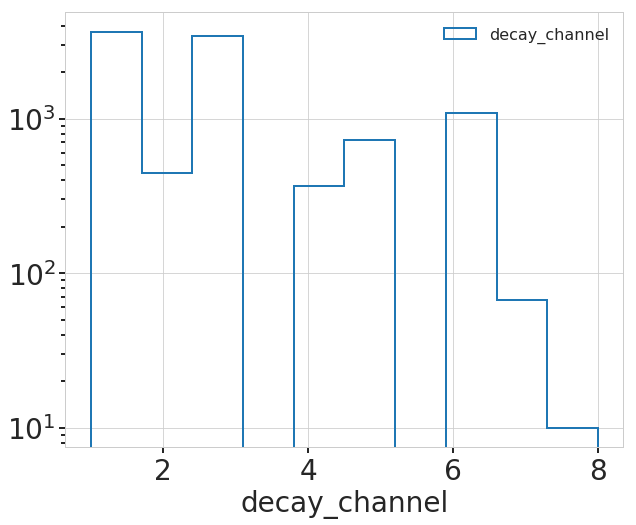

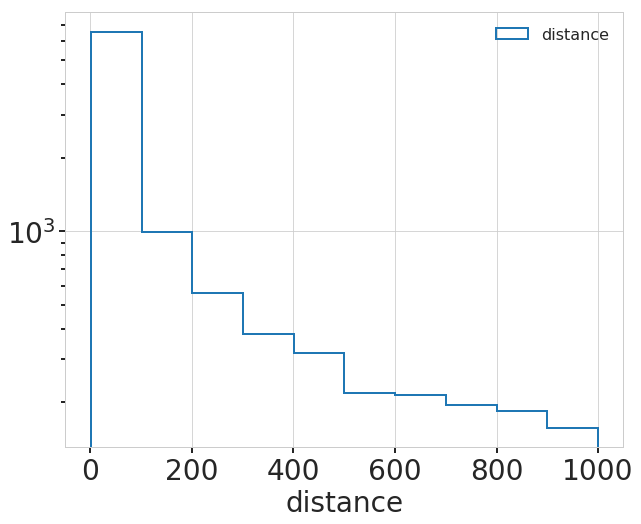

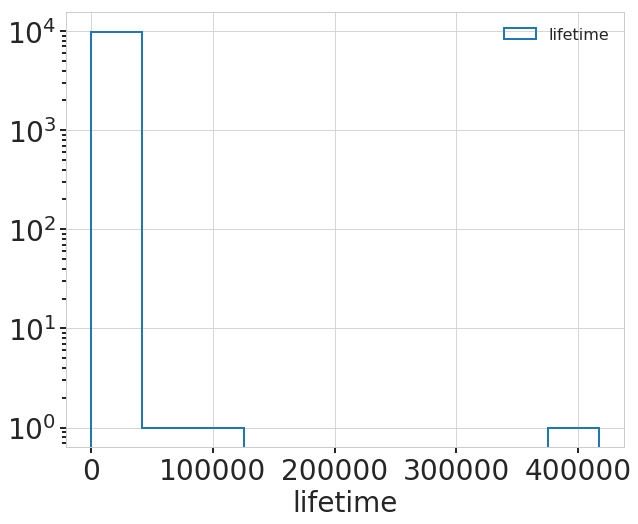

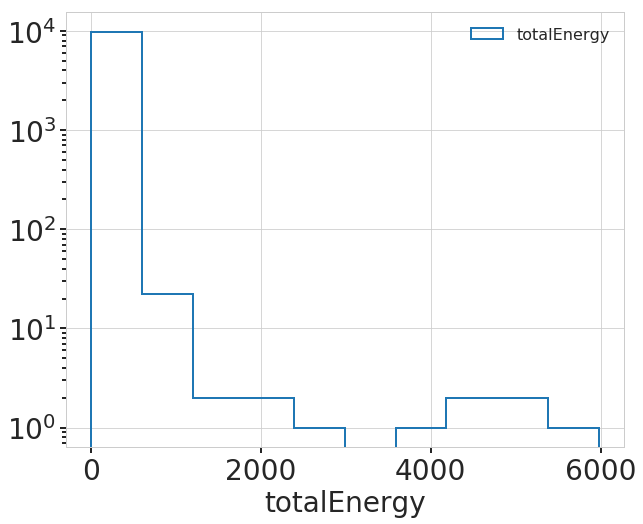

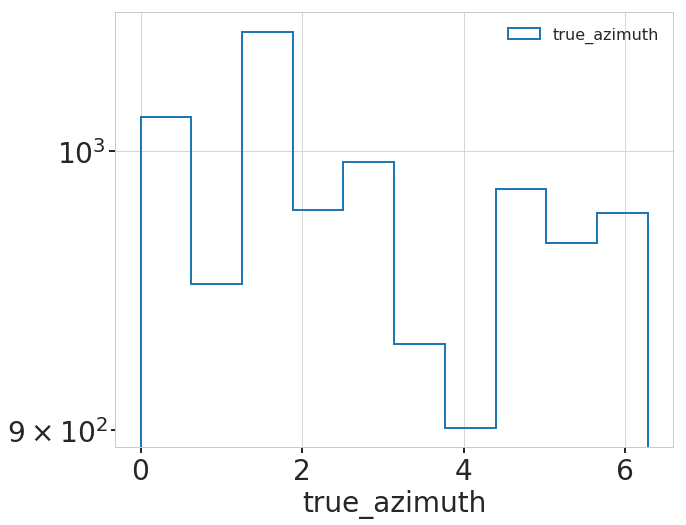

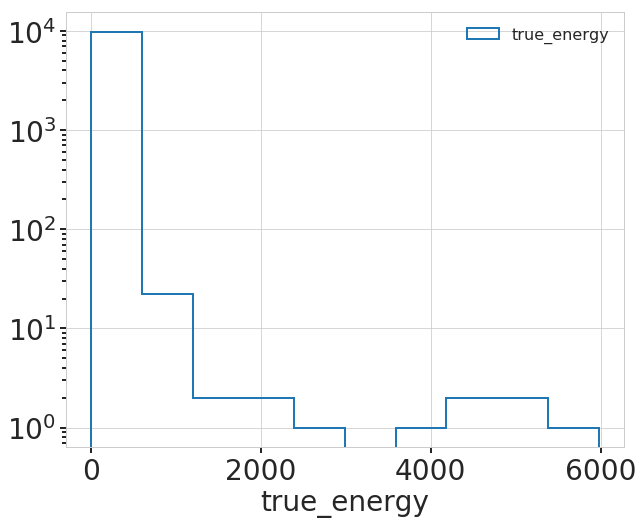

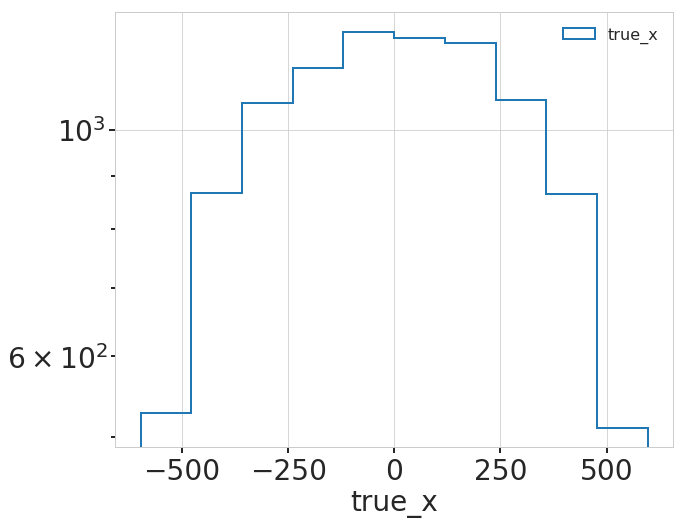

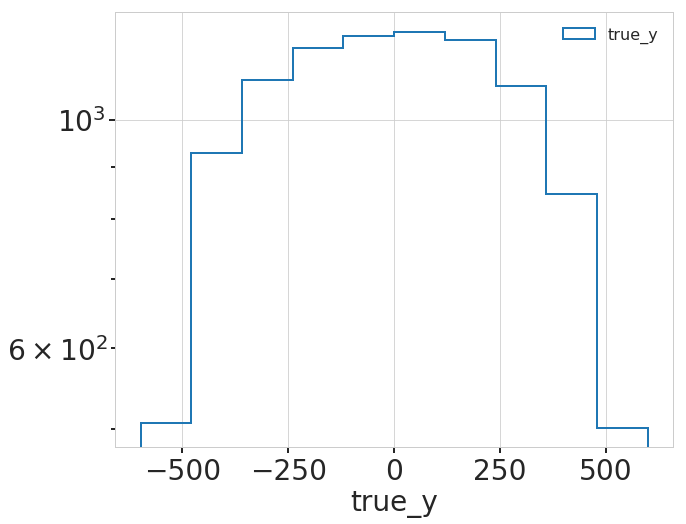

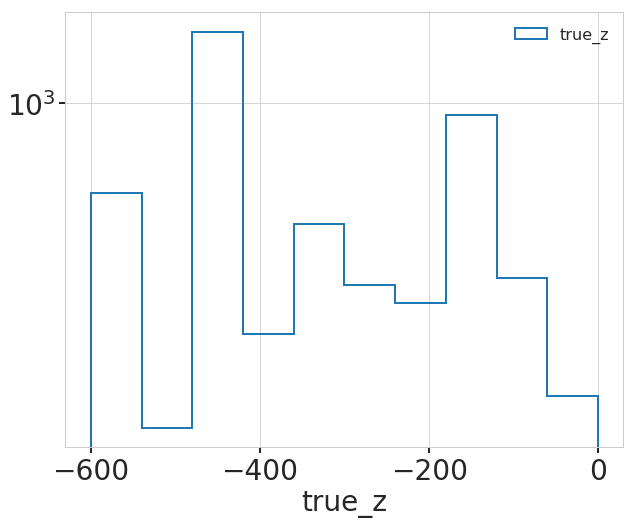

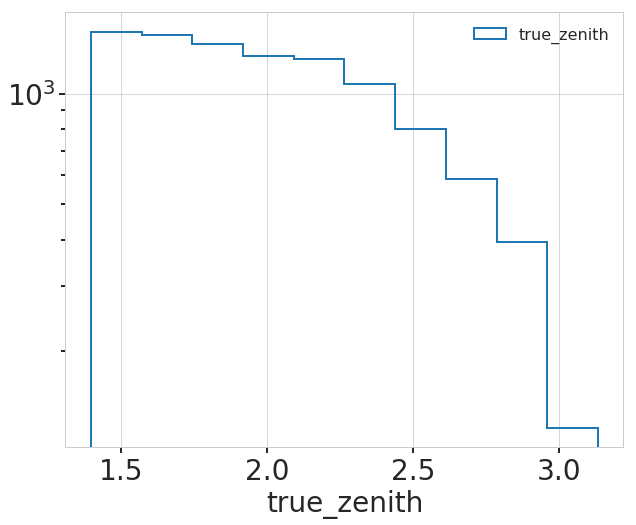

In [14]:
for key, item in dataframe.items():
    
    if not key in plot_keys:continue
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.hist(
        item,
#         bins=plot_bins[key],
        lw=2.,
        histtype='step',
        label=key,
    )
    
    ax.set_xlabel(key)
    ax.set_yscale('log')
    
    ax.legend()
    
#     break

In [15]:
infile_path = '/data/ana/BSM/HNL/MC/190616/Gen/00001-01000/Gen_00001.hdf5'

In [16]:
dataframe = hdf5_to_feather(
    [infile_path],
)

INFO:root:Keys to be extracted: ['final_state_particle0', 'HNL_true_z', 'HNL_true_x', 'HNL_true_y', 'true_zenith', 'casc0_true_zenith', 'finalStateX', 'finalStateY', 'casc0_true_energy', 'casc1_true_y', 'casc1_true_x', 'HNL_true_energy', 'true_azimuth', 'lifetime', 'primary_type', 'HNL_true_zenith', 'HNL_true_azimuth', 'physical', 'casc0_true_time', 'mHNL', 'true_energy', 'HNL_true_time', 'decay_channel', 'casc1_true_energy', 'casc0_true_azimuth', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'true_x', 'casc1_true_time', 'ReferenceWeight_1e-03', 'LifetimeWeight_1e-03', 'final_state_particle1', 'nan_decay_energy', 'distanceMin', 'LeptonInjectorWeight', 'casc1_true_azimuth', 'true_z', 'casc1_true_zenith', 'true_y', 'outgoing_neutrino_energy', 'distance', 'true_time', 'casc1_true_z', 'total_column_depth', 'totalEnergy', 'OneWeight', 'distanceMax']
100%|██████████| 1/1 [00:55<00:00, 55.55s/it]


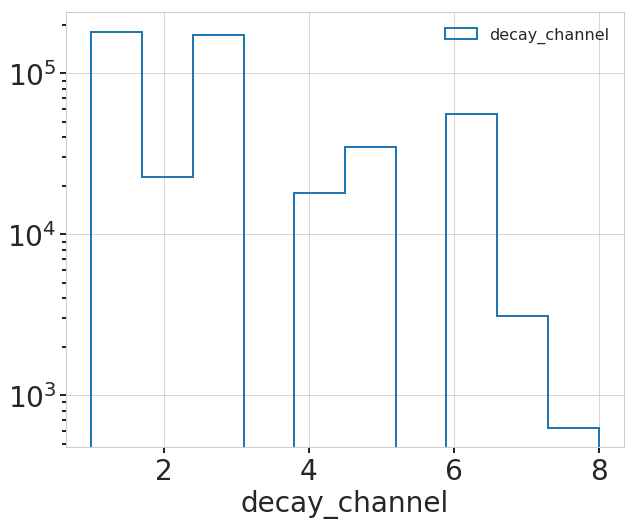

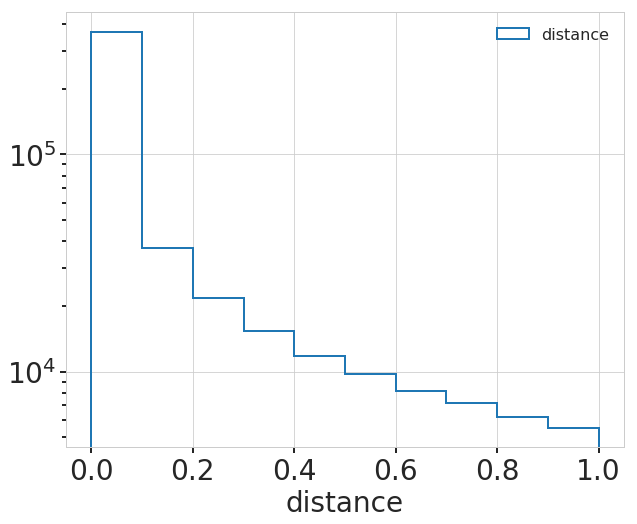

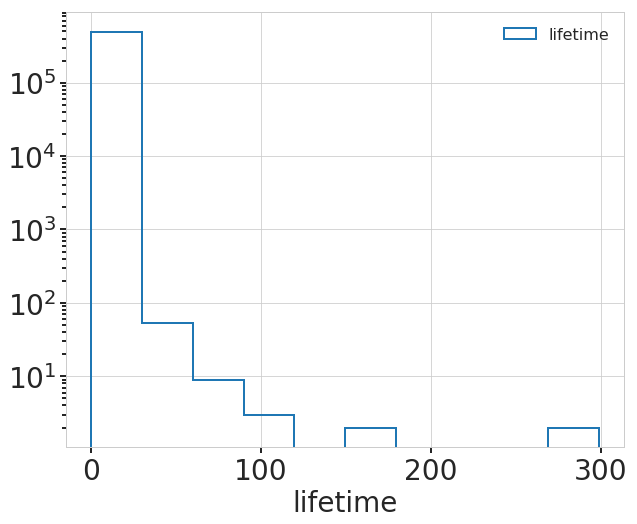

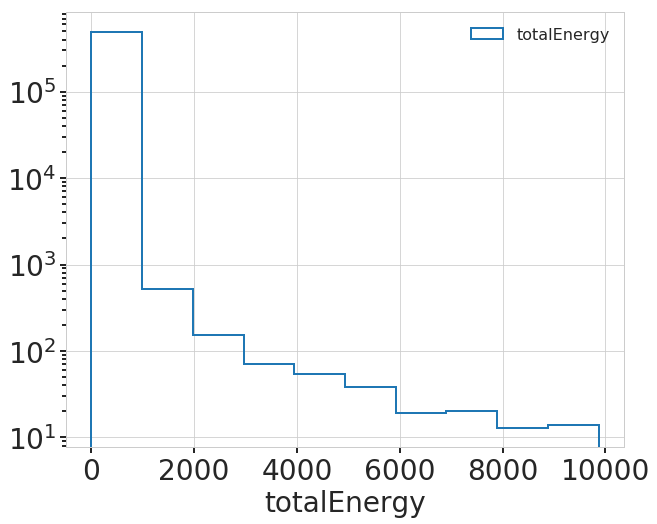

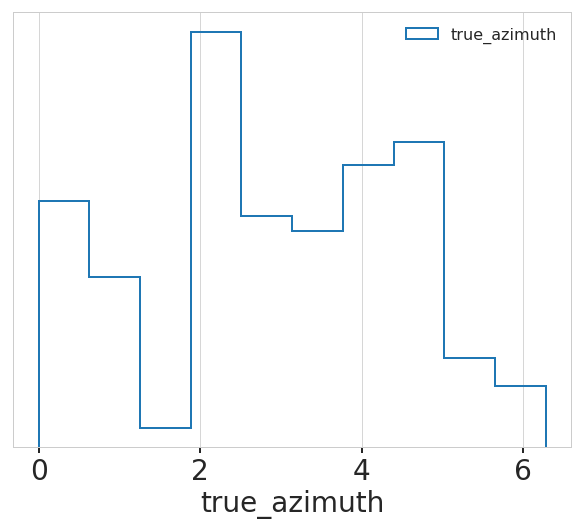

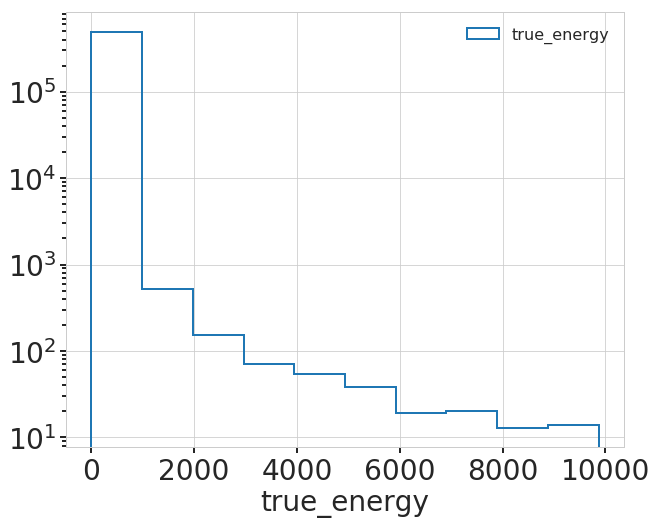

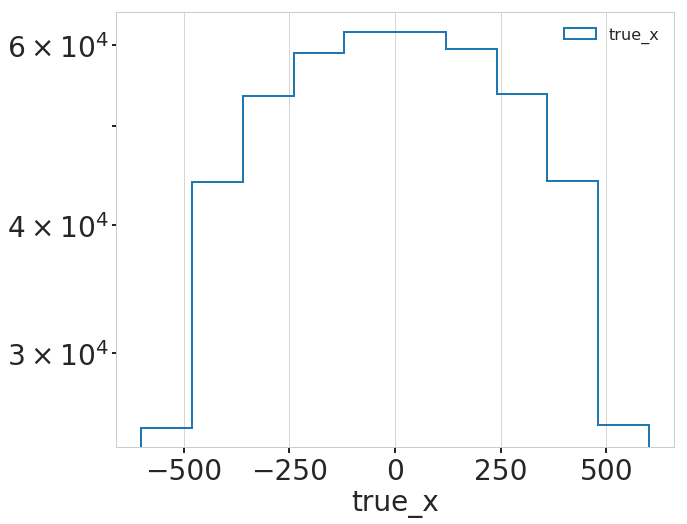

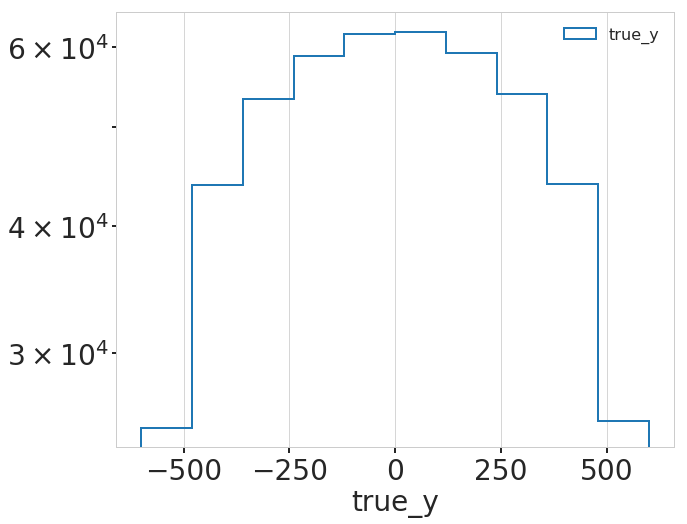

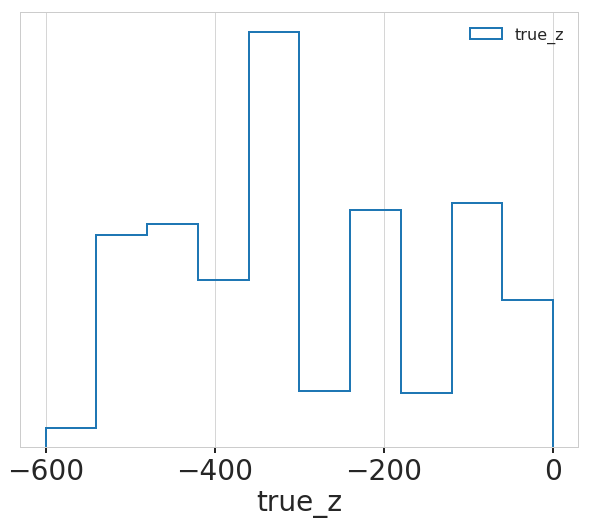

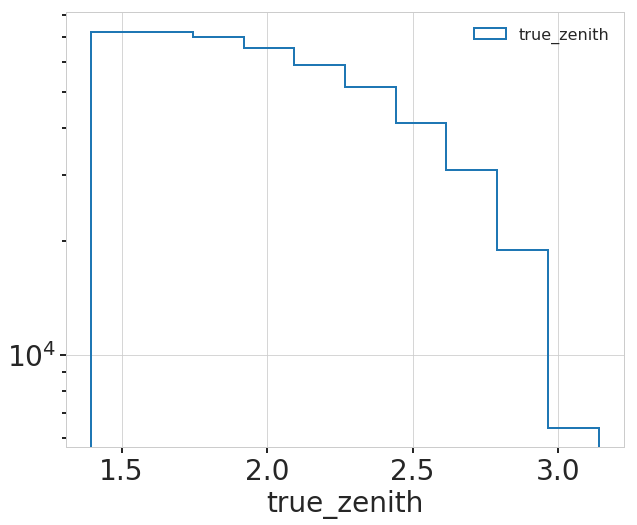

In [18]:
for key, item in dataframe.items():
    
    if not key in plot_keys:continue
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.hist(
        item,
#         bins=plot_bins[key],
        lw=2.,
        histtype='step',
        label=key,
    )
    
    ax.set_xlabel(key)
    ax.set_yscale('log')
    
    ax.legend()
    
#     break

# Old Cells

## Stuff related to weighting (not present in new high length sets at generation)

### Calculate total rate (using the reference weight)

In [7]:
weight_scale = 1e03  # go back to Hz..

weight_key = 'ReferenceWeight_1e-03'

print(r'Expected rates for U_tau4^2={} (Generation):'.format(weight_key.split('_')[-1]))
print('')
for key, item in simset_data.items():
#     print(key)
#     print(len(item))  
    
#     print('Expected rate{:.2e}'.format(weight_scale * np.sum(item['ReferenceWeight_1e-03'])))
    print('{}: {:.2e} Hz +- {:.1e} Hz'.format(set_mass_relation[key], weight_scale * np.sum(item[weight_key]), weight_scale * np.sqrt(np.sum(item[weight_key]**2))))

Expected rates for U_tau4^2=1e-03 (Generation):

0.1 GeV: 6.42e-09 Hz +- 4.5e-12 Hz
0.3 GeV: 1.24e-05 Hz +- 9.4e-09 Hz
0.6 GeV: 1.57e-04 Hz +- 1.1e-07 Hz
1.0 GeV: 5.49e-04 Hz +- 3.6e-07 Hz
1.0 GeV: 4.81e-02 Hz +- 6.4e-05 Hz


## Rates from 10 files (1 GeV Sets)

Expected rates for U_tau4^2=1e-03 (Generation):

1.0 GeV: 5.49e-04 Hz +- 3.6e-07 Hz  (high length)
1.0 GeV: 4.81e-02 Hz +- 6.4e-05 Hz  (low length)

## Rates from 10 files

Expected rates for U_tau4^2=1e-03 (Generation):

0.1 GeV: 6.42e-10 Hz +- 4.5e-13 Hz
0.3 GeV: 1.24e-06 Hz +- 9.4e-10 Hz
0.6 GeV: 1.57e-05 Hz +- 1.1e-08 Hz
1.0 GeV: 5.49e-05 Hz +- 3.6e-08 Hz

## Rates from 50 files

Expected rates for U_tau4^2=1e-03 (Generation):

0.1 GeV: 6.42e-10 Hz +- 2.0e-13 Hz
0.3 GeV: 1.24e-06 Hz +- 4.2e-10 Hz
0.6 GeV: 1.57e-05 Hz +- 4.8e-09 Hz
1.0 GeV: 5.49e-05 Hz +- 1.6e-08 Hz

A few events have a nan reference weight. Not sure why that is, but just don't use them for now.

In [9]:
for sim_set, dataframe in simset_data.items():
    print(sim_set)
    print(sum(np.isnan(dataframe['ReferenceWeight_1e-03'])))

190609
1
190610
1
190611
1
190612
23
190616
23


## Stuff related to sampling bug

### Reverse engineer sampling bug

In [4]:
for key, dataframe in simset_data.items():
    dataframe.info()
    break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324549 entries, 0 to 7324548
Data columns (total 18 columns):
HNL_true_energy      float64
casc0_true_energy    float64
casc1_true_energy    float64
decay_channel        float64
distance             float64
distanceMax          float64
distanceMin          float64
finalStateX          float64
finalStateY          float64
lifetime             float64
mHNL                 float64
n_files              int64
true_azimuth         float64
true_energy          float64
true_x               float64
true_y               float64
true_z               float64
true_zenith          float64
dtypes: float64(17), int64(1)
memory usage: 1005.9 MB


In [5]:
c = 299792458.0  # in m/s

for key, dataframe in simset_data.items():
    
    if key == '190616':
        distanceMin = 0.0001
        distanceMax = 1.
    else:
        distanceMin = 1.
        distanceMax = 1000.

    dataframe['gamma'] = np.sqrt(dataframe['HNL_true_energy']**2 + float(set_mass_relation[key][:3])**2) / float(set_mass_relation[key][:3])

    dataframe['speed'] = c * np.sqrt(1 - 1 / dataframe['gamma']**2)

    dataframe['lifetime_min'] = distanceMin/(dataframe['gamma']*dataframe['speed']) * 1e09
    dataframe['lifetime_max'] = distanceMax/(dataframe['gamma']*dataframe['speed']) * 1e09
    
    dataframe['lifetime_max_prime'] = dataframe['lifetime_min'] + np.log(dataframe['lifetime_max']) -  np.log(dataframe['lifetime_min'])

    dataframe['high_x'] = np.log(dataframe['lifetime_max'])-np.log(dataframe['lifetime_min'])

    dataframe['random_x'] = np.random.uniform(size=len(dataframe)) * dataframe['high_x']

    dataframe['lifetime_test_correct'] = np.exp(np.log(dataframe['lifetime_min']) + dataframe['random_x'])

    dataframe['lifetime_test_wrong'] = np.exp(np.log(dataframe['lifetime_min'] + dataframe['random_x']))

    dataframe['distance_test_correct'] = dataframe['lifetime_test_correct']*1e-09*dataframe['gamma']*dataframe['speed']

    dataframe['distance_test_wrong'] = dataframe['lifetime_test_wrong']*1e-09*dataframe['gamma']*dataframe['speed']

In [7]:
for key, dataframe in simset_data.items():
    print(key)

    print('MIN:')
    print(min(dataframe.lifetime * 1e-09))
    print(min(dataframe.lifetime_test_wrong * 1e-09))
    print(min(dataframe.lifetime_test_correct * 1e-09))

    print('MAX:')
    print(max(dataframe.lifetime * 1e-09))
    print(max(dataframe.lifetime_test_wrong * 1e-09))
    print(max(dataframe.lifetime_test_correct * 1e-09))
    
#     break

190616
MIN:
5.38102746558e-17
1.1401446371e-14
4.23132082389e-17
MAX:
1.22020938115e-06
9.25311222134e-09
6.28129667319e-07
190617
MIN:
3.96259753083e-13
1.97435116644e-12
4.89187680326e-13
MAX:
0.000557327163595
1.13102971879e-05
0.000656060089623


In [8]:
for key, dataframe in simset_data.items():
    print(key)

    print('MIN:')
    print(min(dataframe.distance))
    print(min(dataframe.distance_test_wrong))
    print(min(dataframe.distance_test_correct))

    print('MAX:')
    print(max(dataframe.distance))
    print(max(dataframe.distance_test_wrong))
    print(max(dataframe.distance_test_correct))
    
#     break

190616
MIN:
0.000100000093712
0.000100524969621
0.000100000298025
MAX:
0.999998468864
19689.6496592
0.999999020189
190617
MIN:
1.00000047446
1.00000068514
1.00000060405
MAX:
999.999551274
17875.2584077
999.999769591


190616
/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/reproduce_sampling_bug_lifetime_190616.png
190617
/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/reproduce_sampling_bug_lifetime_190617.png


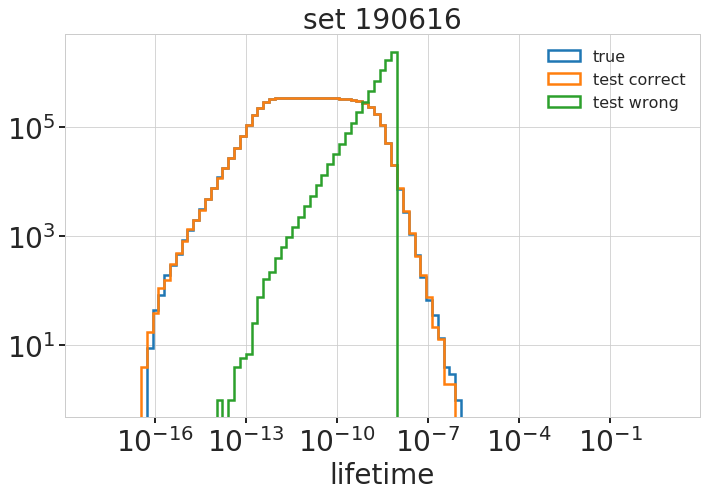

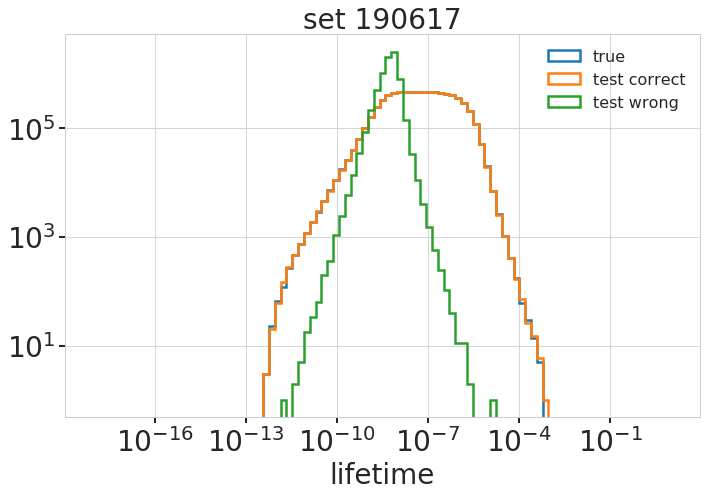

In [12]:
lifetime_bins = np.geomspace(1.0e-18, 1e01, 100)
# lifetime_bins = np.linspace(1e-12, 2e-06, 100)

for key, dataframe in simset_data.items():
    print(key)

    fig, ax = plt.subplots(figsize=(10,7))

    ax.hist(
        dataframe.lifetime * 1e-09,
        bins=lifetime_bins,
        histtype='step',
        label='true',
        lw=2.5,
    )

    ax.hist(
        dataframe.lifetime_test_correct * 1e-09,
        bins=lifetime_bins,
        histtype='step',
        label='test correct',
        lw=2.5,
    )

    ax.hist(
        dataframe.lifetime_test_wrong * 1e-09,
        bins=lifetime_bins,
        histtype='step',
        label='test wrong',
        lw=2.5,
    )

    ax.legend()

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel('lifetime')
    
    ax.set_title('set {}'.format(key))
    
    fig.tight_layout()
    
    outpath = os.path.join(base_plot_dir, 'reproduce_sampling_bug_lifetime_{}.png'.format(key))
    print(outpath)
    
#     fig.savefig(outpath, dpi=300)
    
#     break

190616
/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/reproduce_sampling_bug_distance_190616.png
190617
/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/reproduce_sampling_bug_distance_190617.png


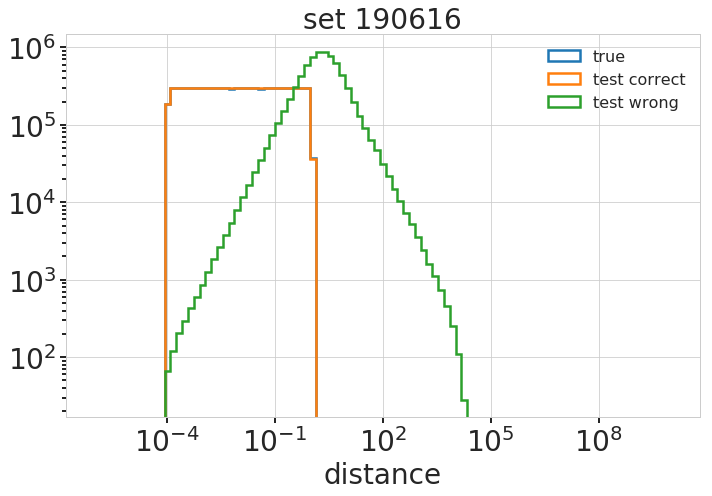

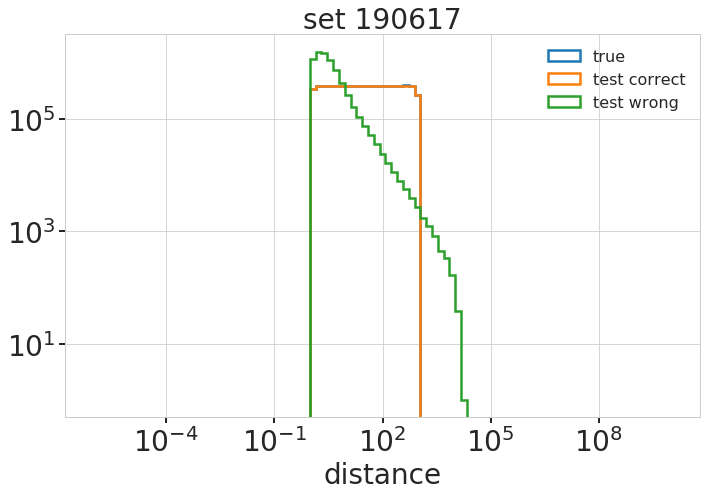

In [13]:
distance_bins = np.geomspace(1.0e-06, 1e10, 100)
# distance_bins = np.linspace(1.0, 2e4, 100)

for key, dataframe in simset_data.items():
    print(key)

    fig, ax = plt.subplots(figsize=(10,7))

    ax.hist(
        dataframe.distance,
        bins=distance_bins,
        histtype='step',
        label='true',
        lw=2.5,
    )

    ax.hist(
        dataframe.distance_test_correct,
        bins=distance_bins,
        histtype='step',
        label='test correct',
        lw=2.5,
    )

    ax.hist(
        dataframe.distance_test_wrong,
        bins=distance_bins,
        histtype='step',
        label='test wrong',
        lw=2.5,
    )

    ax.legend()

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel('distance')
    
    ax.set_title('set {}'.format(key))
    
    fig.tight_layout()
    
    outpath = os.path.join(base_plot_dir, 'reproduce_sampling_bug_distance_{}.png'.format(key))
    print(outpath)
    
#     fig.savefig(outpath, dpi=300)
    
#     break

### Test to fix by re-weighting

In [7]:
for key, dataframe in simset_data.items():
    
    dataframe['distance_min'] = dataframe['lifetime_min'] * 1e-09 * dataframe['gamma'] * dataframe['speed']
    dataframe['distance_max'] = dataframe['lifetime_max'] * 1e-09 * dataframe['gamma'] * dataframe['speed']
    dataframe['distance_max_prime'] = dataframe['lifetime_max_prime'] * 1e-09 * dataframe['gamma'] * dataframe['speed']

In [11]:
N=10

print(dataframe['distance_min'][:N])
print(dataframe['distance_max'][:N])
print(dataframe['distance_max_prime'][:N])


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: distance_min, dtype: float64
0    1000.0
1    1000.0
2    1000.0
3    1000.0
4    1000.0
5    1000.0
6    1000.0
7    1000.0
8    1000.0
9    1000.0
Name: distance_max, dtype: float64
0     5.210150
1     4.426647
2     2.957861
3     1.849859
4     3.344479
5     4.452420
6     3.677813
7    74.644061
8     1.845418
9     8.377399
Name: distance_max_prime, dtype: float64


In [26]:
min(dataframe['distance_max_prime'])

1.0040298175277462

In [14]:
max(dataframe['distance'])

16787.54137229566

## Other cross-checks

### Check boosting calculations

In [12]:
for key, dataframe in simset_data.items():

    dataframe['gamma'] = np.sqrt(dataframe['HNL_true_energy']**2 + 1.0**2) / 1.0

    c = 299792458.0  # in m/s

    dataframe['speed'] = c * np.sqrt(1 - 1 / dataframe['gamma']**2)

    dataframe['hnl_lifetime'] = dataframe['gamma'] * dataframe['lifetime']

    dataframe['hnl_length'] = dataframe['hnl_lifetime'] * dataframe['speed'] * 1e-09  # convert to seconds

In [28]:
for key, dataframe in simset_data.items():
#     dataframe.info()
    np.testing.assert_array_almost_equal(dataframe['hnl_length'], dataframe['distance'])

### Plot 1/L to understand it

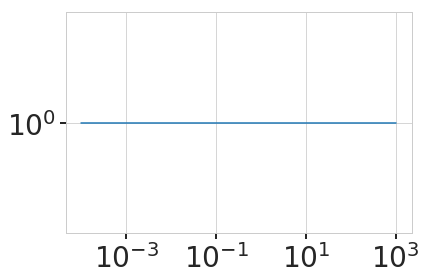

In [36]:
x = np.geomspace(1.0e-04, 1.0e03)
# x = np.linspace(1.0e-04, 1.0e04)

y = 1/x

plt.plot(
    x,
    y * x,
)

plt.xscale('log')
plt.yscale('log')

plt.tight_layout()

# plt.savefig('/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/unweighted/1_over_x_lin.png')
plt.savefig('/data/user/lfischer/plots_all/2023/02_single_mass_gen_level_lots/unweighted/1_over_x_log.png')